In [1]:
import pandas as pd


dataList=[]
csvFiles = ['System 1.csv', 'System 2.csv', 'System 3.csv', 'System 4.csv', 'System 5.csv', 'System 6.csv', 'System 7.csv','System 8.csv', 'System 9.csv']
i=1

for file in csvFiles:
    
    df = pd.read_csv(file, encoding='utf-8', delimiter=',', header=2, skiprows=5, parse_dates=[['Unnamed: 0','Parameter:']], low_memory=False)
    
    df = df.drop([0,1,2])
    df.rename(columns={'Unnamed: 0_Parameter:':"DateTime"}, inplace=True)
    df['Device'] = i
    i=i+1

    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df["TimeDiff"] = df["DateTime"].diff()

    dataList.append(df)
    
data = pd.concat(dataList, ignore_index=True)


# Fill in NaN for previous value
data.ffill(axis = 0, inplace=True)

data1 = data.fillna(value={'Server Watchdog' : '0', 'Beam Is On' : 'Off (0)', 'External State' :'Disabled (1)', 'Is Blanked':'1',  'ServiceModeIsOn':'On (1)'})

#drops first row of each csv
data1 = data1.dropna()

data1["Is Blanked"] = pd.to_numeric(data1["Is Blanked"])
data1["Server Watchdog"] = pd.to_numeric(data1["Server Watchdog"])

data1 = data1.replace(to_replace = 'On (1)', value = 1)
data1 = data1.replace(to_replace = 'Off (0)', value = 0)


data1["Status"] = (data1["External State"] == "Maintain (4)") & (data1["Server Watchdog"] == 1) & (data1["Beam Is On"] == 1) & (data1["Is Blanked"] == 0) & (data1["ServiceModeIsOn"] == 0)

data1.head()

,DateTime,Server Watchdog,Beam Is On,External State,Is Blanked,ServiceModeIsOn,Device,TimeDiff,Status
1,2020-11-25 08:01:23.131,1,0,Disabled (1),1,1,1,0 days 00:01:00.001000,False
2,2020-11-25 08:02:23.130,1,0,Disabled (1),1,1,1,0 days 00:00:59.999000,False
3,2020-11-25 08:03:23.130,1,0,Disabled (1),1,1,1,0 days 00:01:00,False
4,2020-11-25 08:04:23.131,1,0,Disabled (1),1,1,1,0 days 00:01:00.001000,False
5,2020-11-25 08:05:23.131,1,0,Disabled (1),1,1,1,0 days 00:01:00,False


In [9]:
import matplotlib.pyplot as plt

In [3]:
data1.describe()

,Server Watchdog,Beam Is On,Is Blanked,ServiceModeIsOn,Device,TimeDiff
count,7.325379e+06,7.325379e+06,7.325379e+06,7.325379e+06,7.325379e+06,7325379
mean,9.999386e-01,8.733155e-01,5.751889e-01,2.844511e-01,5.123880e+00,0 days 00:00:16.517718891
std,7.837506e-03,3.326192e-01,4.943143e-01,4.511526e-01,2.598610e+00,0 days 01:53:48.555743237
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0 days 00:00:00.001000
25%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0 days 00:00:00.566000
50%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,0 days 00:00:02.577000
75%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,0 days 00:00:13.058000
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,213 days 21:05:08.878000


In [5]:
table1=data1.groupby('Device').describe()
table1

Server Watchdog                                               \
                 count      mean       std  min  25%  50%  75%  max   
Device                                                                
1             444821.0  0.999946  0.007345  0.0  1.0  1.0  1.0  1.0   
2            1133506.0  0.999998  0.001328  0.0  1.0  1.0  1.0  1.0   
3             877407.0  0.999806  0.013918  0.0  1.0  1.0  1.0  1.0   
4             859378.0  0.999997  0.001868  0.0  1.0  1.0  1.0  1.0   
5            1012435.0  0.999998  0.001406  0.0  1.0  1.0  1.0  1.0   
6             237933.0  0.999920  0.008936  0.0  1.0  1.0  1.0  1.0   
7             763753.0  0.999993  0.002559  0.0  1.0  1.0  1.0  1.0   
8            1048564.0  0.999789  0.014516  0.0  1.0  1.0  1.0  1.0   
9             947582.0  0.999996  0.002055  0.0  1.0  1.0  1.0  1.0   

       Beam Is On            ... ServiceModeIsOn      TimeDiff  \
            count      mean  ...             75%  max    count   
Device                       ...                                 
1        444821.0  0.757291  ...             1.0  1.0   444821   
2       1133506.0  0.921749  ...             0.0  1.0  1133506   
3        877407.0  0.898568  ...             1.0  1.0   877407   
4        859378.0  0.925758  ...             0.0  1.0   859378   
5       1012435.0  0.948467  ...             0.0  1.0  1012435   
6        237933.0  0.289607  ...             0.0  1.0   237933   
7        763753.0  0.927951  ...             0.0  1.0   763753   
8       1048564.0  0.764401  ...             1.0  1.0  1048564   
9        947582.0  0.941658  ...             0.0  1.0   947582   

                                                              \
                             mean                        std   
Device                                                         
1       0 days 00:00:17.481003347  0 days 00:00:29.346544331   
2       0 days 00:00:27.935965452  0 days 04:49:16.778421318   
3       0 days 00:00:12.112064531  0 days 00:04:33.543175133   
4       0 days 00:00:12.366139214  0 days 00:00:24.680399595   
5       0 days 00:00:10.496652003  0 days 00:00:23.526009982   
6       0 days 00:00:44.664534427  0 days 00:00:34.689724476   
7       0 days 00:00:11.878201875  0 days 00:00:19.511654418   
8       0 days 00:00:18.452927330  0 days 00:02:50.388619756   
9       0 days 00:00:11.215091579  0 days 00:00:24.242019756   

                                                        \
                           min                     25%   
Device                                                   
1       0 days 00:00:00.001000  0 days 00:00:00.223000   
2       0 days 00:00:00.001000  0 days 00:00:01.079000   
3       0 days 00:00:00.002000  0 days 00:00:00.228000   
4       0 days 00:00:00.001000  0 days 00:00:01.052000   
5       0 days 00:00:00.001000  0 days 00:00:00.732000   
6       0 days 00:00:00.001000  0 days 00:00:19.579000   
7       0 days 00:00:00.001000  0 days 00:00:00.934000   
8       0 days 00:00:00.002000  0 days 00:00:00.231000   
9       0 days 00:00:00.001000  0 days 00:00:00.797000   

                                                        \
                           50%                     75%   
Device                                                   
1       0 days 00:00:00.578000  0 days 00:00:59.999000   
2       0 days 00:00:03.217000  0 days 00:00:09.649000   
3       0 days 00:00:00.726000  0 days 00:00:08.106000   
4       0 days 00:00:03.969000  0 days 00:00:11.280000   
5       0 days 00:00:03.018000  0 days 00:00:08.348000   
6              0 days 00:01:00         0 days 00:01:00   
7       0 days 00:00:03.818000  0 days 00:00:10.400000   
8       0 days 00:00:00.711000  0 days 00:00:59.998000   
9       0 days 00:00:03.315000  0 days 00:00:08.863000   

                                  
                             max  
Device                            
1         0 days 01:59:28.241000  
2       213 days 21:05:08.878000  
3         2 days 08:50:

In [6]:
data1.groupby(['Device'])[['TimeDiff']].sum()


,TimeDiff
Device,
1,89 days 23:58:37.390000
2,366 days 11:59:44.456000
3,123 days 00:00:10.204000
4,122 days 23:59:47.986000
5,122 days 23:59:37.871000
6,122 days 23:59:26.670000
7,105 days 00:00:12.317000
8,223 days 22:44:35.293000
9,123 days 00:00:18.909000


In [7]:
data1.groupby(['Device','Status'])[['TimeDiff']].sum()

TimeDiff
Device Status                         
1      False   86 days 17:43:23.806000
       True     3 days 06:15:13.584000
2      False  337 days 08:08:17.595000
       True    29 days 03:51:26.861000
3      False  117 days 14:05:44.351000
       True     5 days 09:54:25.853000
4      False   92 days 08:07:04.613000
       True    30 days 15:52:43.373000
5      False   92 days 20:29:42.029000
       True    30 days 03:29:55.842000
6      False  120 days 02:12:25.282000
       True     2 days 21:47:01.388000
7      False   80 days 04:19:07.064000
       True    24 days 19:41:05.253000
8      False  221 days 16:02:19.182000
       True     2 days 06:42:16.111000
9      False   92 days 00:38:05.020000
       True    30 days 23:22:13.889000

In [8]:
data1.

,TimeDiff
Device,
1,89 days 23:58:37.390000
2,366 days 11:59:44.456000
3,123 days 00:00:10.204000
4,122 days 23:59:47.986000
5,122 days 23:59:37.871000
6,122 days 23:59:26.670000
7,105 days 00:00:12.317000
8,223 days 22:44:35.293000
9,123 days 00:00:18.909000


array([[<AxesSubplot:title={'center':'DateTime'}>,
        <AxesSubplot:title={'center':'Server Watchdog'}>],
       [<AxesSubplot:title={'center':'Beam Is On'}>,
        <AxesSubplot:title={'center':'Is Blanked'}>],
       [<AxesSubplot:title={'center':'ServiceModeIsOn'}>,
        <AxesSubplot:title={'center':'Device'}>]], dtype=object)

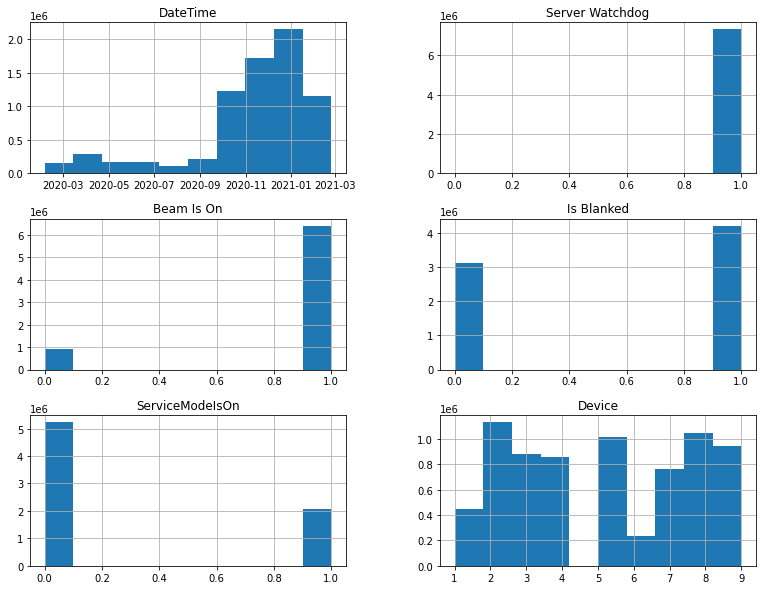

In [13]:
data1.hist(figsize=(13,10))